<center>
    <h1> 
        Teste de Hipótese 1.3: Normalização de Histogramas e Visualização das Médias dos Histogramas das Amostras Boas 
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<p>Lidar com imagens de diferentes tamanhos exige um préprocessamento para ajusta-las para algum modelo, e isso também se reflete para os histogramas dessas imagens. Histogramas de imagens com diferentes tamanhos possuem alturas diferentes, o que atrapalha do aprendizado de vários tipo de modelos. Uma saída para esse tipo de situação é normalizar os dados, para que todos os histogramas tenham a mesma formatação sem perder muito das suas características. Iremos verificar o resultado desse método neste notebook.</p>
<p>Outra coisa que se faz necessária para continuar com a verificação dessa hipótese é verificar as médias dos histogramas dos documentos, e não somente o histogramas de só uma amostra representativa, só sendo possível realizar essa média por meio da normalização dos histogramas.</p>

<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>
Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Comparação entre um histograma com valores "brutos" e normalizados 
2. Média dos histogramas de boas amostras 
3. Normalização e média dos histogramas dos documentos
4. Conclusão

##### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

# 1. Comparação entre um histograma com valores "brutos" e normalizados

In [5]:
# Lê o arquivo
img = cv2.cvtColor(cv2.imread('amostras_boas/rg_frente/rg_frente (1).jpg'), cv2.COLOR_BGR2RGB)
hist = []      # lista para guardar os histogramas "brutos"
hist_norm = [] # lista para guardar os histogramas normalizados
hist.append(cv2.calcHist(img,[0],None,[256],[0,256]))  # histogra "bruto" vermelho
hist.append(cv2.calcHist(img,[1],None,[256],[0,256]))  # histogra "bruto" verde
hist.append(cv2.calcHist(img,[2],None,[256],[0,256]))  # histogra "bruto" azul
for j in range(0,3):     # Laço para normalizar todos os histogramas 
    mm = MinMaxScaler()  # Instanciação do objeto com a função de normalizar 
    hist_norm.append(mm.fit_transform(hist[j], hist[j])) # Normalizando cada canal de acordo com as suas características

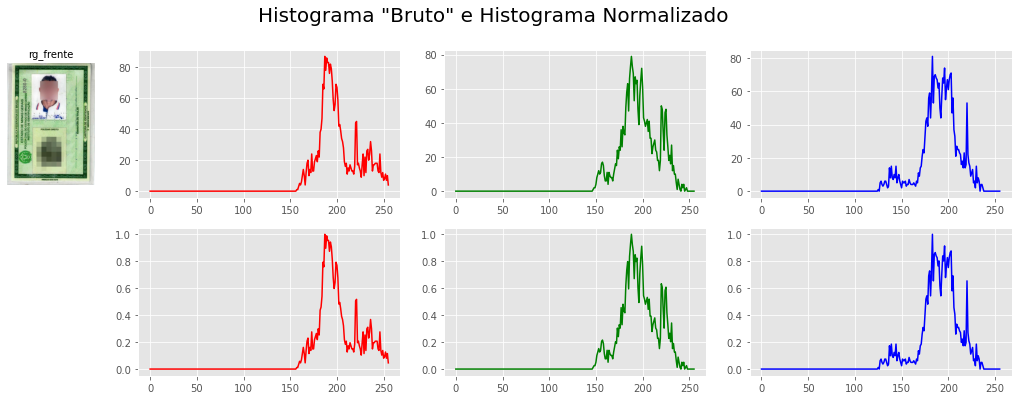

In [6]:
# Agora vamos plotar os dois tipos de histograma
n = 2 # Número de linhas do plot
# Definindo o "esqueleto" do plot e configurações de grade
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

# Ajuste
ax.flatten()
ax = ax.T.flatten()

ax[0].imshow(img) # Plotando o documento
ax[0].axis('off')
ax[0].set_title('rg_frente',fontsize=10)
ax[1].plot(' ')  # Deixando o espaço de baixo em branco
ax[1].axis('off')

# Plot dos histrogramas "brutos"
ax[2].plot(hist[0], color='red')
ax[4].plot(hist[1], color='green')
ax[6].plot(hist[2], color='blue')

# Plot dos histogramas normalizados
ax[3].plot(hist_norm[0], color='red')
ax[5].plot(hist_norm[1], color='green')
ax[7].plot(hist_norm[2], color='blue')
    
fig.suptitle('Histograma "Bruto" e Histograma Normalizado', fontsize=20)
plt.show()

A forma do histograma normalizado ficou identica a do histograma "bruto".

# 2. Média dos histogramas de boas amostras

In [7]:
# Processo analogo ao anterior
rg_frente = []
for i in range(0,20): # A diferença é que estamos fazendo isso agora em um laço para várias amostras
    hist = []
    rg_frente.append(cv2.cvtColor(cv2.imread('amostras_boas/rg_frente/rg_frente ('+str(i+1)+').jpg'), cv2.COLOR_BGR2RGB))
    hist.append(cv2.calcHist(rg_frente[i],[0],None,[256],[0,256]))
    hist.append(cv2.calcHist(rg_frente[i],[1],None,[256],[0,256]))
    hist.append(cv2.calcHist(rg_frente[i],[2],None,[256],[0,256]))
    for j in range(0,3):
        mm = MinMaxScaler()
        hist[j] = mm.fit_transform(hist[j], hist[j])
    rg_frente[i] = hist

In [8]:
# Média dos canais de cores
# Primeiro defimos as variáveis auxiliares
sum_red = 0
sum_green = 0
sum_blue = 0

for i in range(len(rg_frente)): # Laço para somar todos histogramas
    sum_red += rg_frente[i][0]
    sum_green += rg_frente[i][1]
    sum_blue += rg_frente[i][2]
    
sum_red = sum_red/len(rg_frente) # Divisão da soma pelo número de amostras para realizar a média
sum_green = sum_green/len(rg_frente)
sum_blue = sum_blue/len(rg_frente)

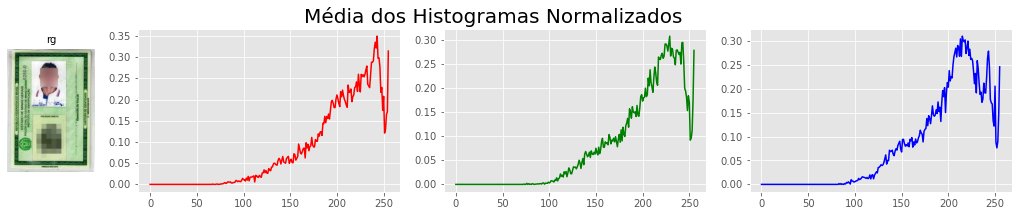

In [10]:
# Plot das médias, processo análogo ao plot anteior
n = 1
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('rg',fontsize=10)

ax[1].plot(sum_red, color='red');
ax[2].plot(sum_green, color='green')
ax[3].plot(sum_blue, color='blue')
    
fig.suptitle('Média dos Histogramas Normalizados', fontsize=20)
plt.show()

Agora que o processo está definido, podemos generalizá-lo para executar para todos os documentos ao mesmo tempo

# 3. Normalização e média dos histogramas dos documentos

In [15]:
# Lista de nomes para facilitar o acesso as pastas e aos arquivos
documentos = ['cpf_frente','cpf_tras','rg_frente','rg_tras','cnh_frente','cnh_tras']

In [18]:
# Faço para repetir o processos anteriores de um vez para todos os documentos
medias = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,20):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        doc.append(cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2RGB))
         
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    sum_red = 0
    sum_green = 0
    sum_blue = 0
    
    for i in range(len(doc)):
        sum_red += doc[i][0]
        sum_green += doc[i][1]
        sum_blue += doc[i][2]
        
    sum_red = sum_red/len(doc)
    sum_green = sum_green/len(doc)
    sum_blue = sum_blue/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_red, sum_green, sum_blue]}

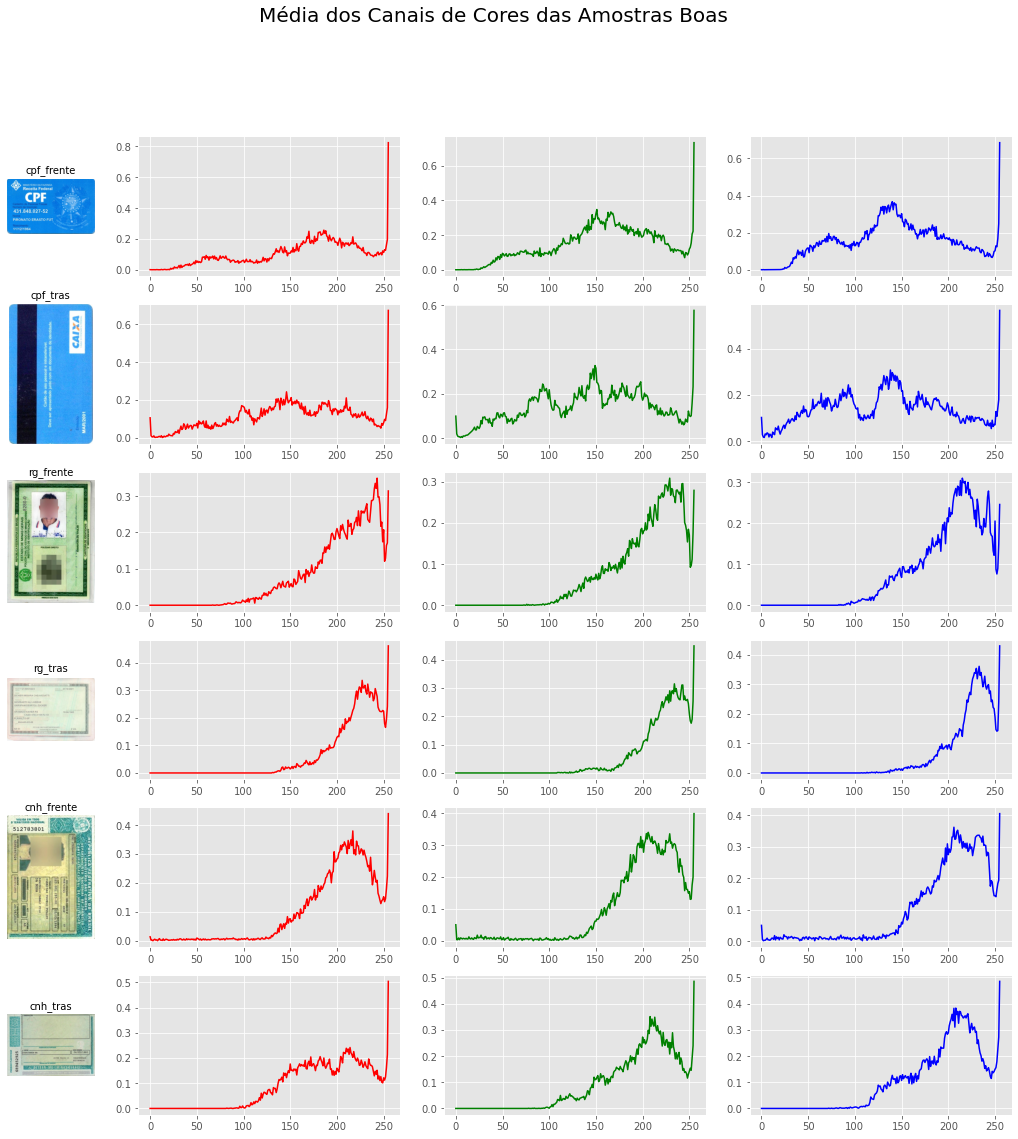

In [25]:
# Plot análogo ao anterior
n = len(medias.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in medias.items():
    ax[0+(cont)].imshow(value['matrix']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist'][0], color='red');
    ax[n*2+(cont)].plot(value['hist'][1], color='green')
    ax[n*3+(cont)].plot(value['hist'][2], color='blue')
    cont+=1
    
fig.suptitle('Média dos Canais de Cores das Amostras Boas', fontsize=20)
plt.show()

# 4. Conclusão

Nesse teste verificamos as médias da amostras boas para reforçar a hipótese da classificação de documentos pelos canais de cores. Idealmente, essa verificação deveria ter sido feita no primeiro notebook, e não somente de 1 amostra representativa, mas só depois acabei lembrando da importância dessa verificação. Dessa maneira, podemos ver que as amostras boas de documentos podem ser separadas pelos canais de cores a partir da inferência da distinção das suas médias, com menção ao verso do rg e a frente da cnh que possuem canais parecidos.